#Project ML
#Customer_Segmentation by using K-Means Clustering

#Importing independencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
df.shape

(200, 5)

#Choosing the AnnualIncome and Spending SCore(1-100)

In [10]:
X = df.iloc[:,[3,4]].values

In [11]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#Choose Number of Clusters
#WCSS(With Clusters Sum of Squares)


In [13]:
from sklearn.cluster import KMeans

In [17]:
wcss=  []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k,init="k-means++")
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [18]:
wcss

[269981.28000000014,
 186362.95600651755,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 38831.14638083547,
 31248.853151807467,
 25063.652515864094,
 21862.09267218289,
 21772.943213993214]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

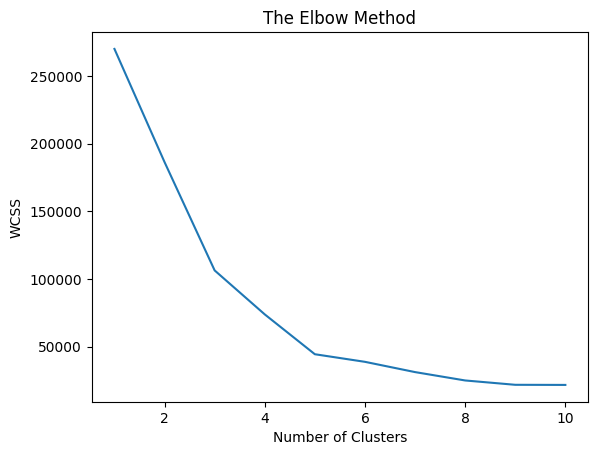

In [19]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt

#We need to chooose k=5

In [25]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=0)
y_kmeans = kmeans.fit_predict(X)


In [26]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

#Visulazie the all the Clusters

#X[y_means==0,0]-->This is mY  X-coordinare,X[y_means==0,1] --> this is my Y coordinate
#y_means ==0,0 -> first 0 is my cluster second 0 is my annual_income column
#y_means ==01,0 -> first 1 is my cluster second 0 is my annual_income column
#y_means ==2,0 -> first 2 is my cluster second 0 is my annual_income column
#y_means ==3,0 -> first 3 is my cluster second 0 is my annual_income column
#y_means ==4,0 -> first 4 is my cluster second 0 is my annual_income column
----
#y_means ==0,1 -> first 0 is my cluster second 1 is my spending score column
#y_means ==01,1 -> first 1 is my cluster second 1 is my spending score column
#y_means ==2,1 -> first 2 is my cluster second 1 is my spending score column
#y_means ==3,1 -> first 3 is my cluster second 1 is my spending score column
#y_means ==4,1 -> first 4 is my cluster second 1 is my spending score column

#5 Clusters is 0,1,2,3,4

#Plotting the centeroids

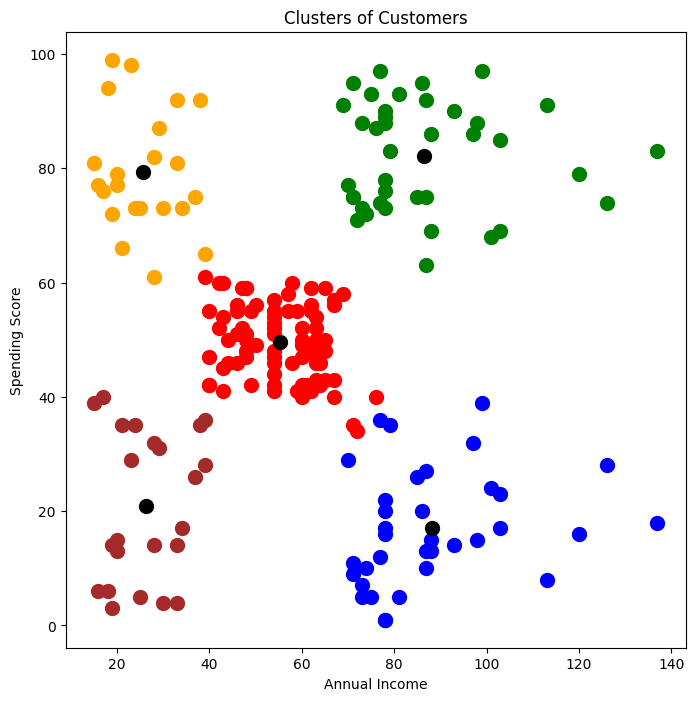

In [41]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c="red",label="Cluster 1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c="green",label="Cluster 2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c="blue",label="Cluster 3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c="brown",label="Cluster 4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c="orange",label="Cluster 5")

#Plotting the centroids

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c="black", label="Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

#plt.scatter(x, y, s=SIZE, c=COLOR, marker=SHAPE, label="Cluster 1")
#x: The x-coordinates of the data points.
#y: The y-coordinates of the data points.
#s: The size of each marker (default is s=20).
#c: The color of the markers.
#marker: The shape of the marker (e.g., 'o' for circles, 's' for #squares).
#label: The label for the legend.
